<img src="logo-catedra.png" width="400"> <img src="Logo-GIIATa-small.png" width="100"> 
<div style="text-align: right"> _Por: V. Robles B._ </div>

# Redes Neuronales con Scikit-Learn: una introducción - Parte 2

En este cuaderno se presenta una breve introducción de los principales aspectos para crear, entrenar y validar redes neuronales artificiales en Python con la librería [scikit-learn](http://scikit-learn.org/stable/index.html). A lo largo del cuaderno se hará especial énfasis en el **Perceptrón multicapa** como herramienta para realizar tareas de clasificación.


## Ejemplo básico 2: Corpus Iris
El corpus Iris es uno de los ejemplos más utilizados para aprender a diseñar redes neuronales. Este corpus tiene las siguientes características:

* Posee 150 muestras de 3 tipos de flores (50 c/u): Iris-Setosa, Iris-Virgínica e Iris-Versicolor.
* Cada muestra contiene 4 variables (decimales) que representan estas características de cada flor:
    * Longitud del pétalo
    * Longitud del sépalo
    * Grosor del pétalo
    * Grosor del sépalo

El objetivo consiste en diseñar y entrenar una red neuronal que permita clasificar las muestras en base a las características de dichas flores.

### Lectura de los datos
Como primer paso procederemos a cargar los datos empleando para ello la librería [Pandas](https://pandas.pydata.org/). Para ello, emplearemos el método **read_csv** y dado que el fichero no tiene nombres en cada columna (los datos inician en la primera fila), especificamos los nombres que deseamos que sean cargados al leer el fichero.

Es importante observar, que el método **read_csv** devuelve un objeto [dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

datos = pd.read_csv('corpus/iris/iris.data',names=['longitud_sepalo','grosor_sepalo',\
                                                   'longitud_petalo','grosor_petalo','flor'])

datos.head()


,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


También podemos analizar el corpus empleando la función **describe** que provee **Pandas**. Los valores que podemos obtener de cada variable, son los siguientes:
* Conteo (*count*)
* Media (*mean*)
* Desviación estándar (*std*)
* Mínimo (*min*)
* Percentiles, que son los valores que están entre *25%, 50%, 75%*.
* Máximo (*max*)

In [3]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitud_sepalo,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
grosor_sepalo,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
longitud_petalo,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
grosor_petalo,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Como podemos apreciar, la última columna contiene cadenas de texto que describen el tipo de flor. Para ello, podemos emplear la función [map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) que provee **Pandas** y reemplazar las cadenas por valores numéricos que sí puedan ser entendidos por la red neuronal.

In [2]:
datos['flor']=datos['flor'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
datos.head()

,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Diseño de la Red Neuronal
Como siguiente punto, diseñaremos una red neuronal (clasificador perceptrón multicapa) para poder aprender a distinguir entre los diferentes tipos de flores.

La red neuronal artificial tendrá las sigiuentes características:

* Entradas: 4
* Número de capas: 2
* Neuronas en la capa oculta: 7
* Neuronas en la capa de salida: 1

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> /home/vlarobbyk/.conda/envs/ia2/lib/python3.7/site-packages/viznet/context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


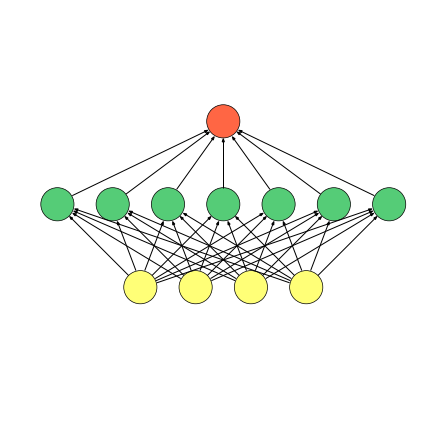

In [3]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 4
neuronas_capa_oculta = 7
neuronas_capa_salida = 1


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()

### Preprocesamiento de los datos y generación de los corpus de entrenamiento y  pruebas

Como paso previo a entrenar la red neuronal, es fundamental preprocesar los datos (escalar, cambiar formatos, etc.), ya que en caso contrario no se obtendrán resultados óptimos en el proceso de clasificación.



In [7]:
# Importamos la función para separar test y train
from sklearn.model_selection import train_test_split

# Importamos la función para escalar los valores
from sklearn.preprocessing import StandardScaler


# Separamos en una variable los datos de entrada, para ello generamos una copia del dataframe
# eliminando la última columna del corpus (la que tiene los tipos de flores)
X=datos.drop('flor',axis=1)

# Procedemos de la misma forma, pero en este caso para generar un arreglo que tenga las salidas
# deseadas
d=datos['flor']

# Mostramos en pantalla los primeros datos con la función 'head'
X.head()
d.head()

# Generamos los corpus para entrenamiento y pruebas de modo que se tome el mismo número de muestras de cada clase
X_train, X_test, d_train, d_test = train_test_split(X,d,train_size=0.70,random_state=0,stratify=d)


# Generamos un objeto para escalar los valores
scaler=StandardScaler()

print(scaler)

# Ajuste solo en los datos de entrenamiento
scaler.fit(X_train)

# Escalamos el corpus de entrenamiento
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Visualizamos las 7 primeras filas de datos
X_train[1:7,:]


StandardScaler(copy=True, with_mean=True, with_std=True)


/home/vlarobbyk/.conda/envs/ia2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([[ 2.14194987,  1.67393943,  1.63709442,  1.31005616],
       [ 0.62547602,  0.34908787,  0.85828251,  1.44106177],
       [-1.47425699,  1.23232224, -1.53378264, -1.31005616],
       [-0.77434598,  0.79070506, -1.31126495, -1.31005616],
       [-1.70756066, -0.09252931, -1.36689437, -1.31005616],
       [-1.12430149, -1.41738087, -0.25430593, -0.26201123]])

### Creación, entrenamiento y validación de la Red Neuronal
A continuación emplearemos **sckikit learn** para crear, entrenar y probar la red neuronal [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) que se especificó con anterioridad. Los parámetros que se usarán son los siguientes:

* Algoritmo para la reducción del error en el entrenamiento: **lbfgs** optimizador basado en métodos cuasi-Newtonianos. Mayor información en este [link](https://en.wikipedia.org/wiki/Limited-memory_BFGS).
* Función de activación de las neuronas: **logística** (_logistic_)
* Máximo número de iteraciones (*max_iter*): 10000


In [8]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(X_train,d_train)



MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
       validation_fraction=0.1, verbose=True, warm_start=False)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
       validation_fraction=0.1, verbose=True, warm_start=False)

### Predicción y evaluación de la red

El último paso es evaluar el funcionamiento de la red. Para ello, determinaremos cómo se comporta en tareas de predicción con la parte de pruebas (**X_test, d_test**):


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(d_test.value_counts())

prediccion = mlp.predict(X_test)
print('Matriz de Confusion\n')
print(confusion_matrix(d_test, prediccion))
print('\n')

print(classification_report(d_test, prediccion))

2    15
1    15
0    15
Name: flor, dtype: int64
Matriz de Confusion

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Práctica ANN-3:

Modifique el código anterior, a fin de incorporar las siguientes modificaciones:

* Incorporar [Hot Encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) y contar con 3 salidas en lugar de 1. Compare los resultados.
* Generar una gráfica donde se puedan analizar las 4 variables y cómo se distribuyen la mismas (analizadas de dos en dos). Para ello, se recomienda emplear el siguente ejemplo:

<img src="imagenes/ejemplo-matrix-scatter.jpg" width="600"> 

* Pruebe la misma red neuronal pero sin escalar los datos y compare los resultados.

In [ ]:
# TO-DO:
# Emplear el código anterior a fin resolver los aspectos planteados en la práctica ANN-3



### Práctica ANN-4:

Reproducir el mismo experimento para el corpus del censo realizado en el año 1996 (**censo**), considerando las siguientes premisas:

1. Realizar todas las fases de diseño, entrenamiento y validación de la red neuronal
2. Probar la red con el método de validación visto, y realizar el contraste de forma manual
3. Realizar la gráfica de los datos

In [ ]:
# TO-DO:
# Desarrollar el mismo proceso de experimentación para el caso del corpus de vinos (wines)



## Referencias
[1] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), 2825-2830.

[2] Portilla, J. (2017). A Beginner’s Guide to Neural Networks in Python and SciKit Learn 0.18. Retrieved from https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/.

[3] The Asimov Institute. (2018). THE NEURAL NETWORK ZOO. Retrived from: http://www.asimovinstitute.org/neural-network-zoo/